 $y^{(1)} = x_1^{(1)}w_1+x_2^{(1)}w_2+b$

 $y^{(2)} = x_1^{(2)}w_1+x_2^{(2)}w_2+b$

 $y^{(3)} = x_1^{(3)}w_1+x_2^{(3)}w_2+b$


$$
y = \begin{bmatrix}
  y^{(1)} \\
      y^{(2)} \\
     y^{(3)}  
\end{bmatrix} 
$$

$$
X = \begin{bmatrix}
 x_1^{(1)} & x_2^{(1)} \\
      x_1^{(2)} & x_2^{(2)}  \\
      x_1^{(3)} & x_2^{(3)} \\
\end{bmatrix}
$$


$$
w = \begin{bmatrix}
  w_1  \\
  w_2 
\end{bmatrix}
y = Xw + b 
$$

In [1]:
# %matplotlib inline

import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.randn(num_examples, num_inputs, dtype=torch.float32)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float32)

print(features[0], labels[0])
print(features)
print(labels.shape)



tensor([-0.0768,  0.1139]) tensor(3.6677)
tensor([[-0.0768,  0.1139],
        [-0.0797,  0.2609],
        [ 0.6663,  0.8200],
        ...,
        [-0.8323, -0.0539],
        [-0.7451,  0.6097],
        [ 0.0591, -1.2550]])
torch.Size([1000])


In [2]:
def use_svg_display():
  display.set_matplotlib_formats("svg")


In [3]:
def set_figsize(figsize):
  use_svg_display()
  plt.rcParams["figure.figsize"] = figsize

D:\Temp\ipykernel_15844\3972613902.py:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats("svg")


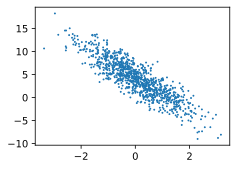

In [4]:
set_figsize(figsize=(3.5,2.5))
plt.scatter(features[:,1].numpy(),labels.numpy(),1)

## 读取数据

在训练模型的时候，我们需要遍历数据集并不断读取小批量数据样本

In [5]:
def data_iter(batch_size, features, labels):
  num_examples = len(features)
  indices = list(range(num_examples))
  random.shuffle(indices)
  for i in range(0, num_examples, batch_size):
    j = torch.LongTensor(indices[i : min(i + batch_size, num_examples)])
    yield features.index_select(0, j), labels.index_select(0, j)


In [6]:
batch_size = 10
# for X, y in data_iter(batch_size=batch_size, features=features, labels=labels):
#   print(X, y)
#   break


In [7]:
# 初始化模型参数
# 设置权重
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)


In [8]:
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], requires_grad=True)

In [9]:
# 计算
def linreg(X, w, b):
  return torch.mm(X, w) + b


In [10]:
# 损失函数计算
def squared_loss(y_hat, y):
  return (y_hat-y.view(y_hat.size())) ** 2 / 2

In [11]:

def sgd(params, lr, batch_size):
  for param in params:
    param.data -= lr * param.grad / batch_size

In [12]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
  for X, y in data_iter(batch_size=batch_size, features=features, labels=labels):
    l = loss(net(X, w, b), y).sum()
    l.backward()
    sgd([w, b], lr, batch_size)
    w.grad.data.zero_()
    b.grad.data.zero_()

  train_l = loss(net(features, w, b), labels)
  print("epoch %d, loss %f" % (epoch + 1, train_l.mean().item()))


epoch 1, loss 0.037773
epoch 2, loss 0.000146
epoch 3, loss 0.000051


In [13]:
print(true_w , '\n', w)
print(true_b, '\n', b)

[2, -3.4] 
 tensor([[ 1.9998],
        [-3.3997]], requires_grad=True)
4.2 
 tensor([4.2002], requires_grad=True)


In [14]:
# 读取数据
# pytorch 提供data包来读取数据
import torch.utils.data as Data

batch_size = 10 
dataset = Data.TensorDataset(features,labels)
data_iter = Data.DataLoader(dataset,batch_size,shuffle=True)

for X, y in data_iter:
  print(X,y)
  break

tensor([[ 0.1589,  1.1364],
        [ 0.6163,  1.7711],
        [-1.3024,  1.3624],
        [-0.1724,  0.0909],
        [-0.4316,  0.8171],
        [-1.3054,  1.5705],
        [ 0.2048,  0.1147],
        [-0.5868, -0.1593],
        [ 0.7130, -0.4849],
        [ 0.8528, -0.9061]]) tensor([ 0.6494, -0.5896, -3.0336,  3.5481,  0.5697, -3.7411,  4.2164,  3.5687,
         7.2678,  8.9826])


In [15]:
import torch.nn as nn

# 定义网络
class LinearNet(nn.Module):
  def __init__(self, n_features):
    super(LinearNet, self).__init__()
    self.linear = nn.Linear(n_features, 1)

  def forward(self, x):
    y = self.linear(x)
    return y


In [16]:
# net = LinearNet(num_inputs)

# 使用nn.Sequential来更加方便地搭建网络

# 写法一
# net = nn.Sequential(
  # nn.Linear(num_inputs, 1)
  # 还可以传入其他层
# )

# 写法二
net = nn.Sequential()
net.add_module("linear", nn.Linear(num_inputs, 1))
# net.add_module()...
print(net)


Sequential(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


In [17]:
# 可以通过net.parameters() 来查看模型所有的可学习参数
for param in net.parameters():
  print(param)


Parameter containing:
tensor([[-0.6557, -0.3263]], requires_grad=True)
Parameter containing:
tensor([-0.2765], requires_grad=True)


In [18]:
# 初始化模型参数
from torch.nn import init

# 通过init.normal_将权重参数每个元素初始化为随机采样于均值为0、标准差为0.01的正态分布
init.normal_(net.linear.weight, mean = 0 ,std = 0.01)
init.constant_(net.linear.bias,val = 0)


Parameter containing:
tensor([0.], requires_grad=True)

In [19]:
# 定义损失函数
loss = nn.MSELoss()

In [20]:
# 定义优化算法
import torch.optim as optim

optimizer = optim.SGD(net.parameters(),lr = 0.03)
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.03
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [21]:
# 开始训练
num_epochs = 3 
for epoch in range(1,num_epochs+1):
  for X, y in data_iter:
    output = net(X)
    l = loss(output, y.view(-1,1))
    optimizer.zero_grad()
    l.backward()
    optimizer.step()
  
  print("epoch %d , loss: %f " % (epoch, l.item()))

epoch 1 , loss: 0.000286 
epoch 2 , loss: 0.000092 
epoch 3 , loss: 0.000150 


In [22]:
dense = net.linear
print(true_w, dense.weight)
print(true_b, dense.bias)

[2, -3.4] Parameter containing:
tensor([[ 1.9993, -3.3994]], requires_grad=True)
4.2 Parameter containing:
tensor([4.2001], requires_grad=True)
